# Exploring Correlations between CO2 Emissions and Average Temperatures #

### Hypothesis: There is a direct correlation between Average Land Temperature and Absolute CO2 Emissions ###


We will explore the data using plots of CO2 Emission at a Country, Regional and Global level vs Average Land Temperature over the past half century. We have data available since 1950.

Datasets used:
1. World Development Indicators: https://www.kaggle.com/worldbank/world-development-indicators
2. Climate Change: Earth Surface Temperature Data: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data



In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import scipy
from scipy.stats import pearsonr

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (10, 8)

In [12]:
idf = pd.read_csv('world-development-indicators/Indicators.csv')
tdf = pd.read_csv('GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')
tdf_world = pd.read_csv('GlobalLandTemperatures/GlobalTemperatures.csv')
tdf_world['Country'] = 'World'
tdf_world['AverageTemperature'] = tdf_world['LandAverageTemperature']
cdf = pd.read_csv('world-development-indicators/Country.csv')
adf = pd.read_csv('phys_geo/phys_geo.csv')
cig_df = cdf[['CountryCode', 'TableName', 'IncomeGroup']]

In [13]:
idf.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [14]:
tdf[tdf.Country == 'India'].dropna().head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,1796-01-01,17.044,2.044,India
243696,1796-02-01,19.193,1.359,India
243697,1796-03-01,22.319,2.125,India
243698,1796-04-01,27.233,1.510,India
243699,1796-05-01,30.035,1.338,India


In [15]:
tdf.Country.unique()

array(['\xc3\x85land', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "C\xc3\xb4te D'Ivoire",
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Cura\xc3\xa7ao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Domi

In [16]:
idf.CountryName.unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)', 'Euro area',
       'Europe & Central Asia (all income levels)',
       'Europe & Central Asia (developing only)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Latin America & Caribbean (developing only)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (all income levels)',
       'Middle East & North Africa (developing only)', 'Middle income',
       'North America', 'OECD members', 'Other small states',
       'Pacific island small states', 'Small states', 'South Asia',
       'Sub-Saharan Afr

In [17]:
tdf['date'] = pd.to_datetime(tdf['dt'])
tdf['Year'] = tdf['date'].dt.year
tdf['Month']= tdf['date'].dt.month

tdf_world['date'] = pd.to_datetime(tdf_world['dt'])
tdf_world['Year'] = tdf_world['date'].dt.year
tdf_world['Month']= tdf_world['date'].dt.month

indicator_dict = {
    'CO2': {
        'indicator': 'EN.ATM.CO2E.KT',
        'ind_name': 'CO2 Emission',
    },
    'FA': {
        'indicator': 'AG.LND.FRST.K2',
        'ind_name': 'Forest Area % Land',
    },
    'EC': {
        'indicator': 'EG.ELC.COAL.ZS',
        'ind_name': 'Electriciy from Coal'
    },
    'METH': {
        'indicator': 'EN.ATM.METH.KT.CE',
        'ind_name': 'Methane Emission'
    },
}

Some common functions that we will be using:

In [18]:
def plot_correlation(idf, tdf, country, indicator_dict):
    """
    Function used to plot the correlation between temperature data and CO2 emissions over time.
    """
    indicator = indicator_dict['indicator']
    ind_name = indicator_dict['ind_name']
    df_indicator = idf[(idf.IndicatorCode == indicator) & (idf.CountryName == country)].sort_values('Year')
    df_temp = tdf[(tdf.Country == country) & (tdf.Year >= 1960)].dropna().groupby(['Year']).mean().reset_index('Year').sort_values('Year')
    df_combined = pd.merge(df_indicator, df_temp, on='Year')
    title = '{0} {1} | Pearsonr: {2:.2f}'.format(country, ind_name, pearsonr(df_combined.Value, df_combined.AverageTemperature)[0])
    ax = df_combined.plot(x='Year', y='Value', kind='scatter', 
                          c='AverageTemperature', s=100, xlim=(1950, 2020), title=title)
    ax.set_xlabel("Year")
    ax.set_ylabel(ind_name)
    
def clean_country_list(country_list):
    cleaned_countries = []
    for country in country_list:
        splits = country.split(',')
        cleaned_countries.append(splits[0])
    return cleaned_countries

def get_regional_df(country_list, region_name):
    """
    Samples and aggregates data over a specific region and returns dataframes that can be used by plot_correlation
    """
    cleaned_countries = clean_country_list(country_list)
    idf_reg = idf[idf.CountryName == region_name]
    tdf_reg = tdf[tdf.Country.isin(cleaned_countries)].groupby('Year').mean().reset_index('Year')
    tdf_reg['Country'] = region_name
    return idf_reg, tdf_reg

Let's initialize some countries that are of interest to us:

In [19]:
developing_countries = ['India', 'Brazil', 'Mexico', 'China', 'South Africa']
eurozone_countries = ['United Kingdom', 'Germany', 'Sweden', 'Switzerland', 'Finland']
north_america_countries = ['Canada', 'United States']

Let's look at Developing countries such as India, China and Brazil. If the hypothesis is true, then we should expect to see a positive correlation between the CO2 emission and Average Land Temperatures, since developing nations generally tend to have CO2 emissions increase over the years.

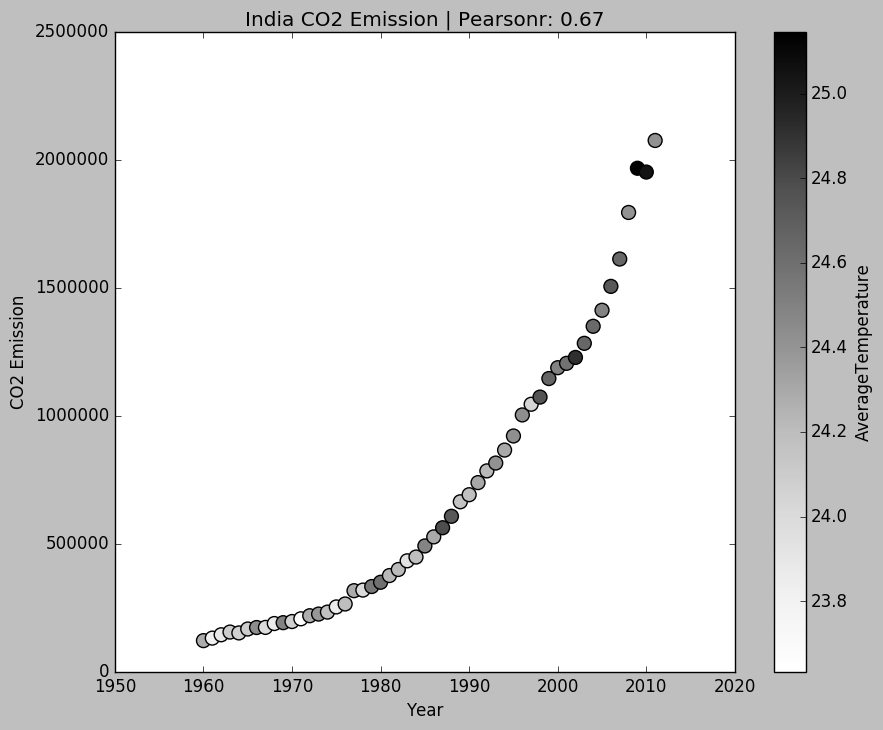

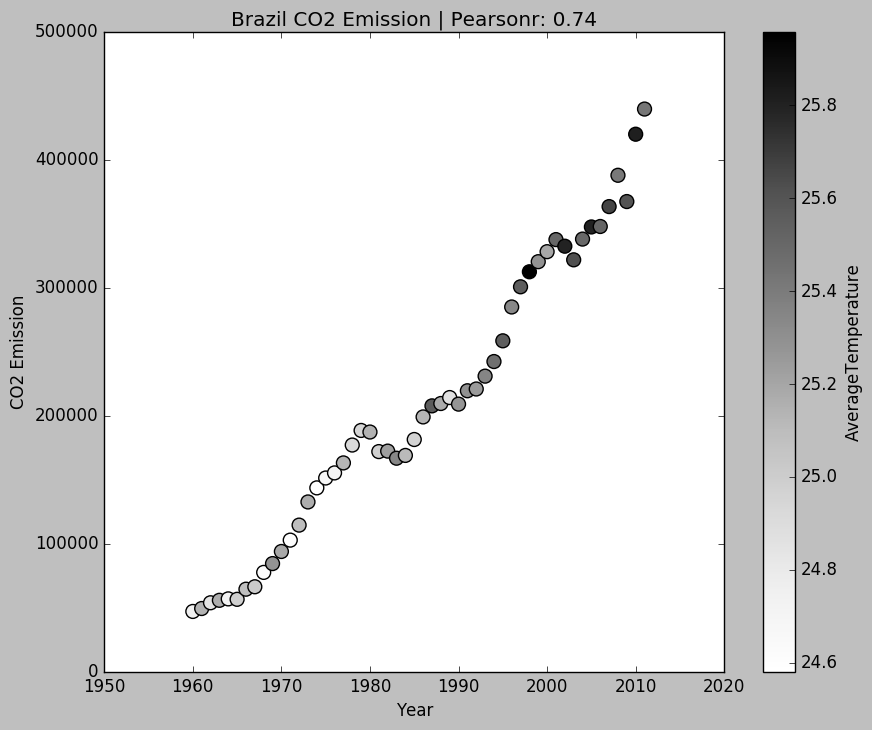

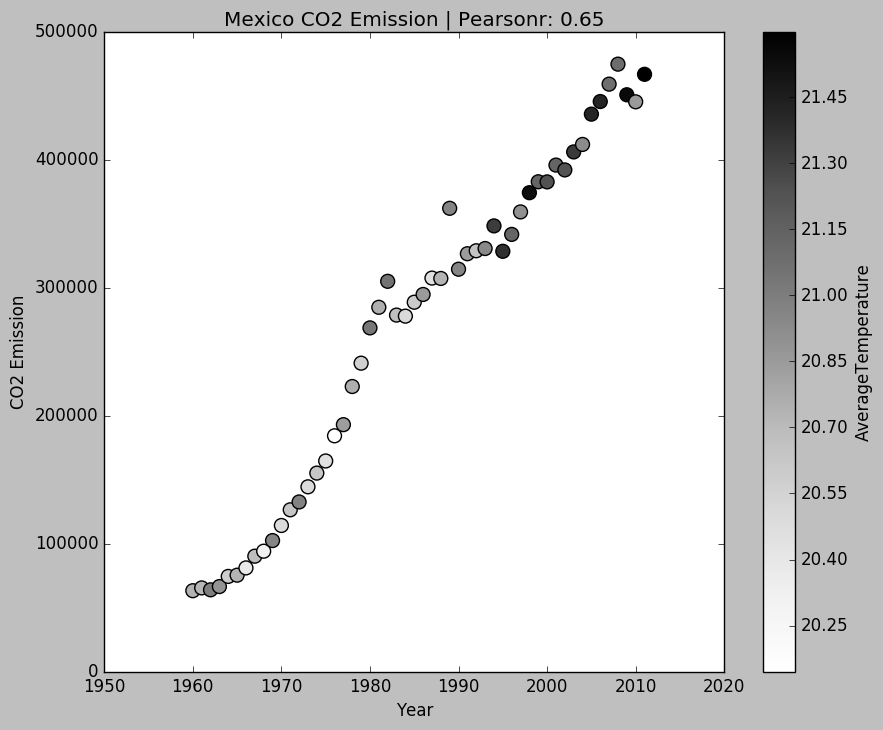

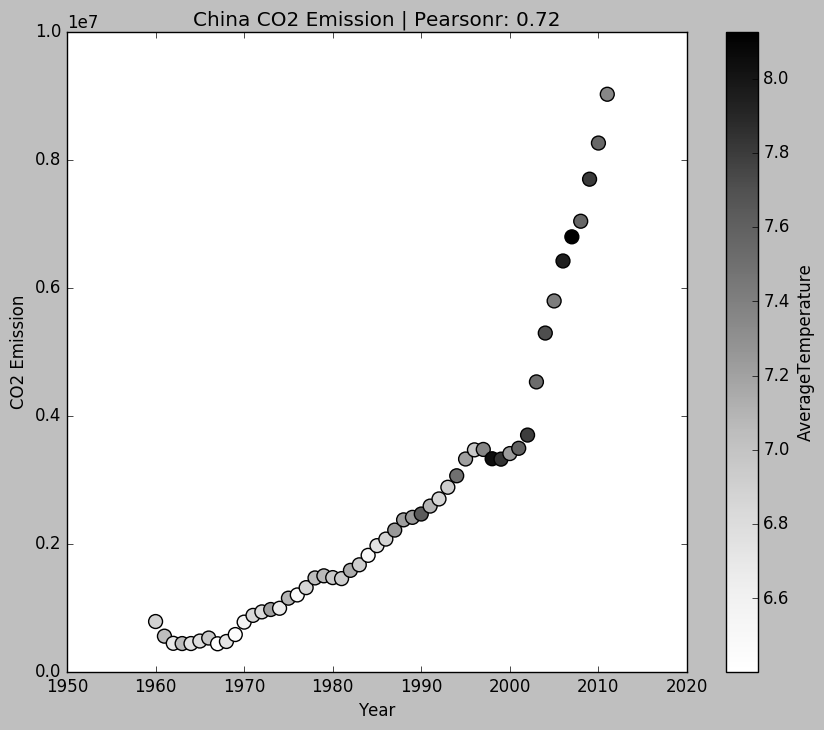

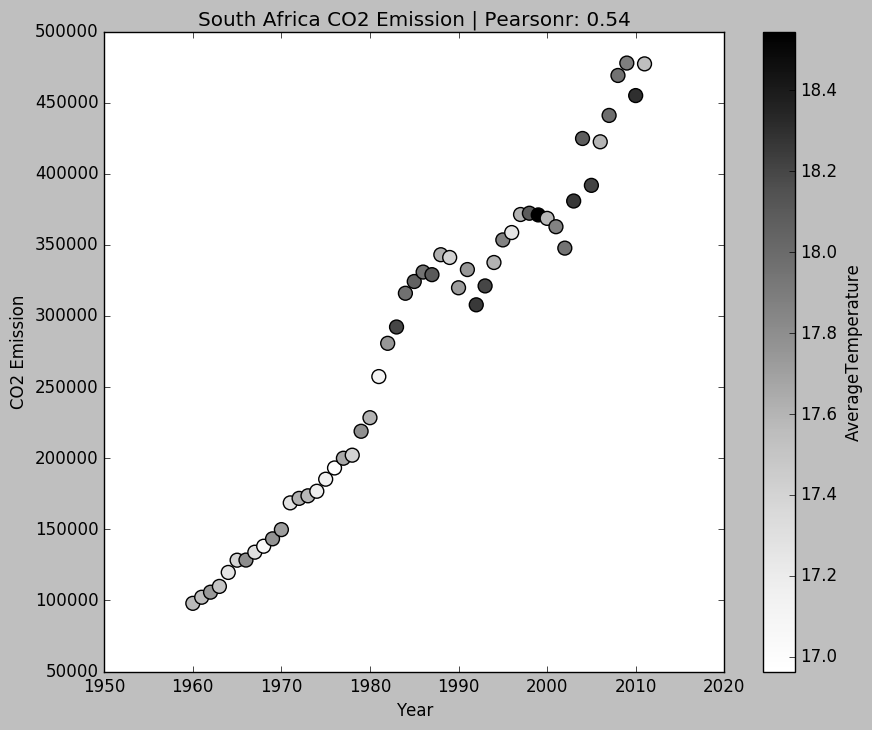

In [20]:
for country in developing_countries:
    plot_correlation(idf, tdf, country, indicator_dict['CO2'])

Not surprisingly, we see a *strong correlation* between CO2 emission and average land temperatures. The pearson correlation coefficient averages over 0.6, which indicates that increased CO2 emissions have contributed to an increase in average land temperature over the past half century.

Now, let's turn our attention to developed economies in North America, particularly Canada and USA. The expectation here depends on whether these countries have indeed reduced their CO2 emission over the past 50 years. If they have, we expect the land temeperatures to stabilize or even reduce, and if not, we expect to see more of the same as above

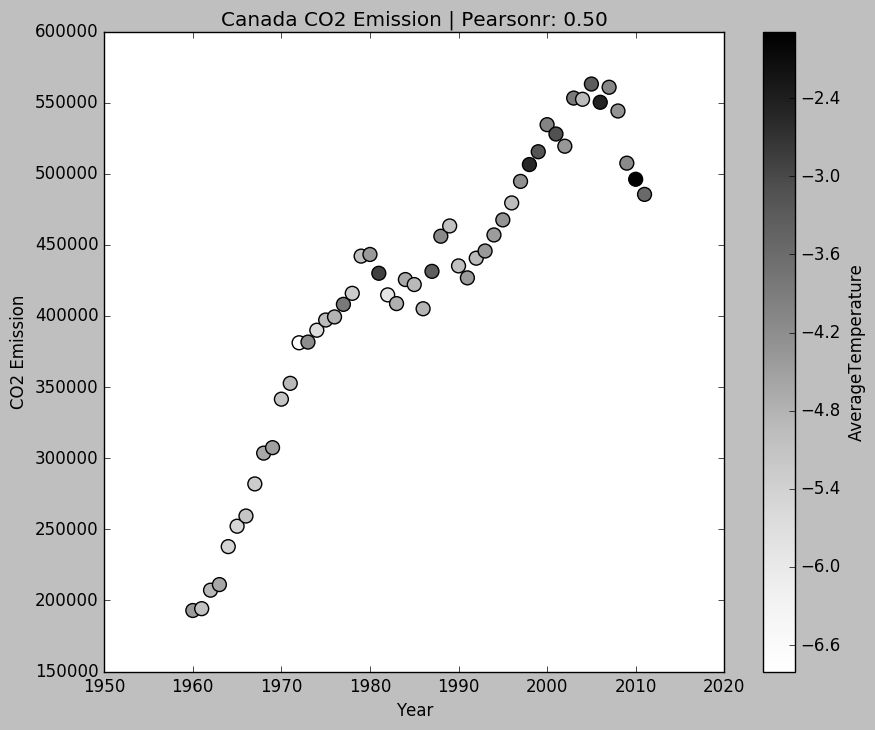

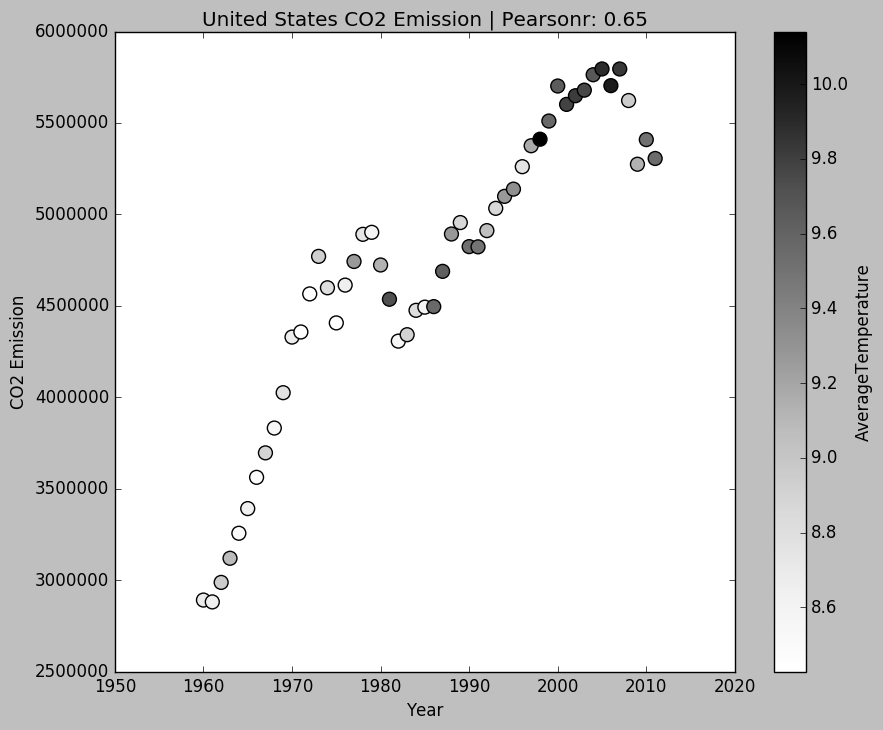

In [21]:
for country in north_america_countries:
    plot_correlation(idf, tdf, country, indicator_dict['CO2'])

The plots reveal that Canada and the USA have not made significant reductions in CO2 emissions over the past 50 years. Although there is a recent reduction in emissions as indicated by the downward trend, we have not had a sustained period of reduction that can contribute to reducing the temperature. Therefore, we do see a positive correlation, albeit a diminished one.

Time to look at the European Union. Our expectations remain the same here, if these countries have reduced CO2 emissions, we expect to see a reduction in average land temperatures.

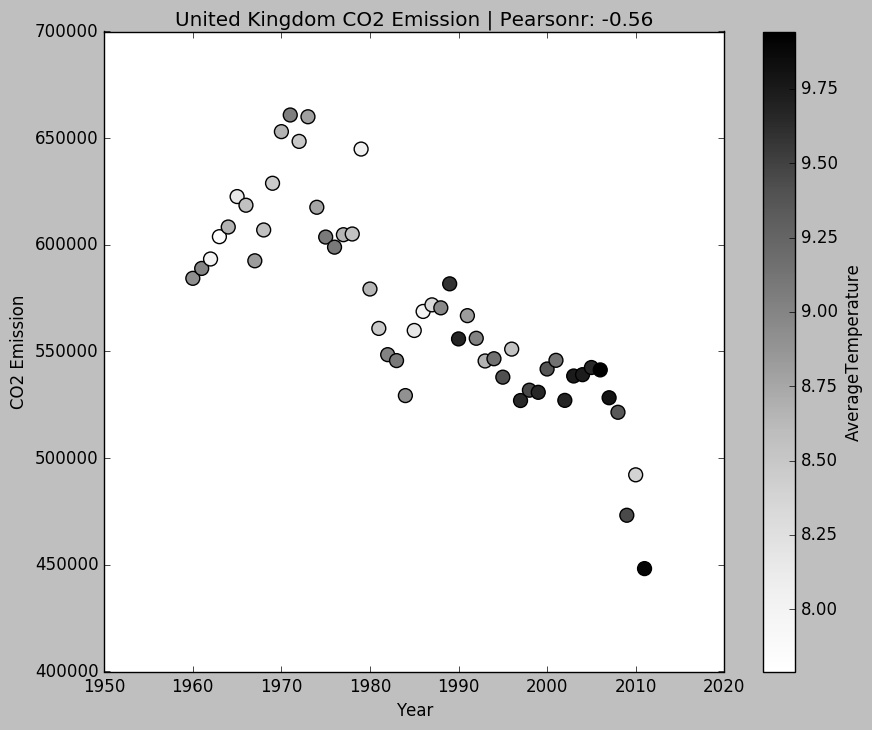

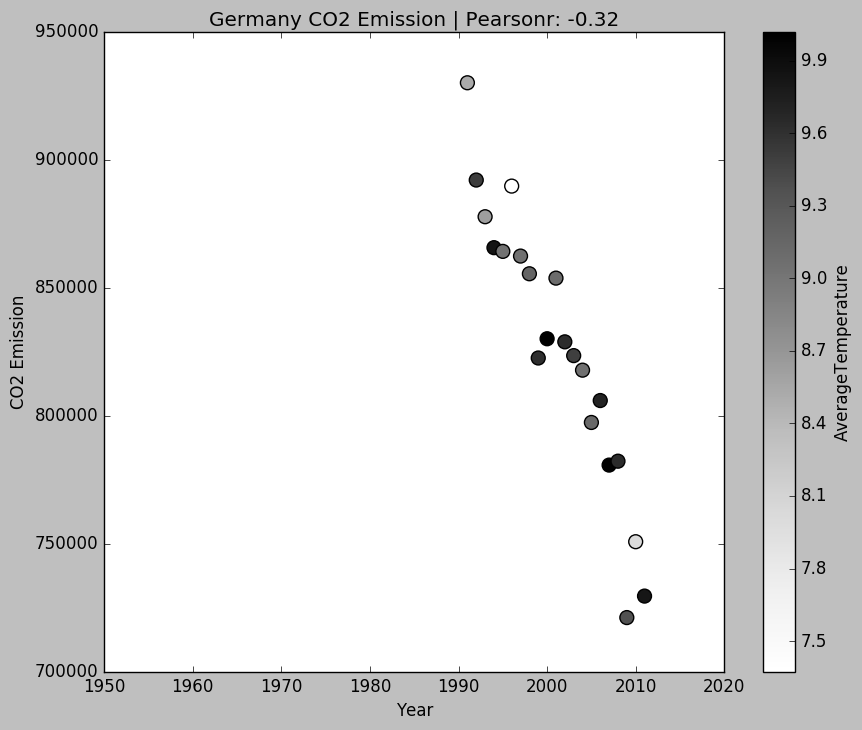

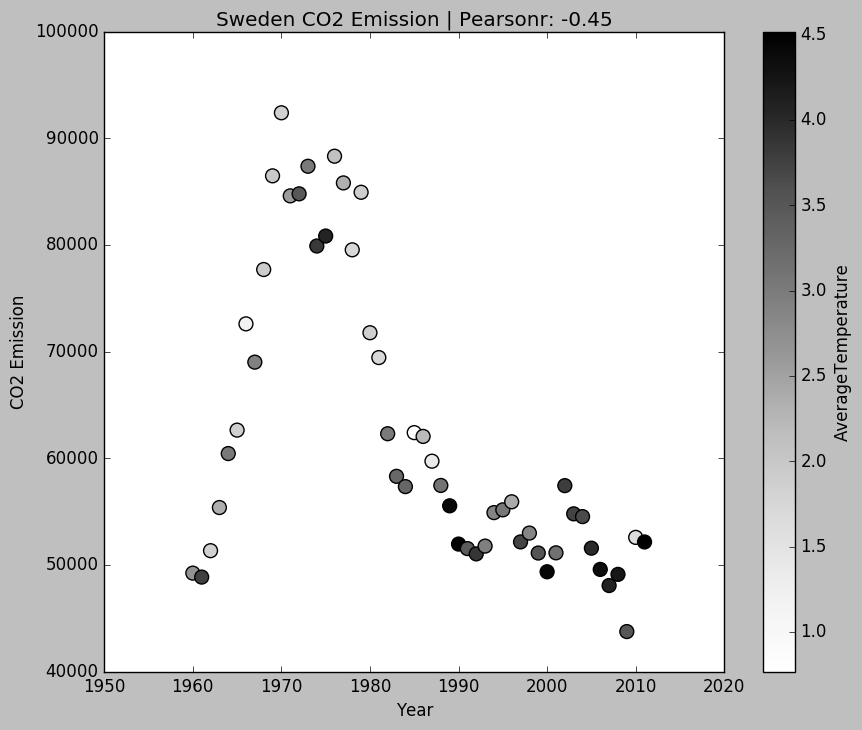

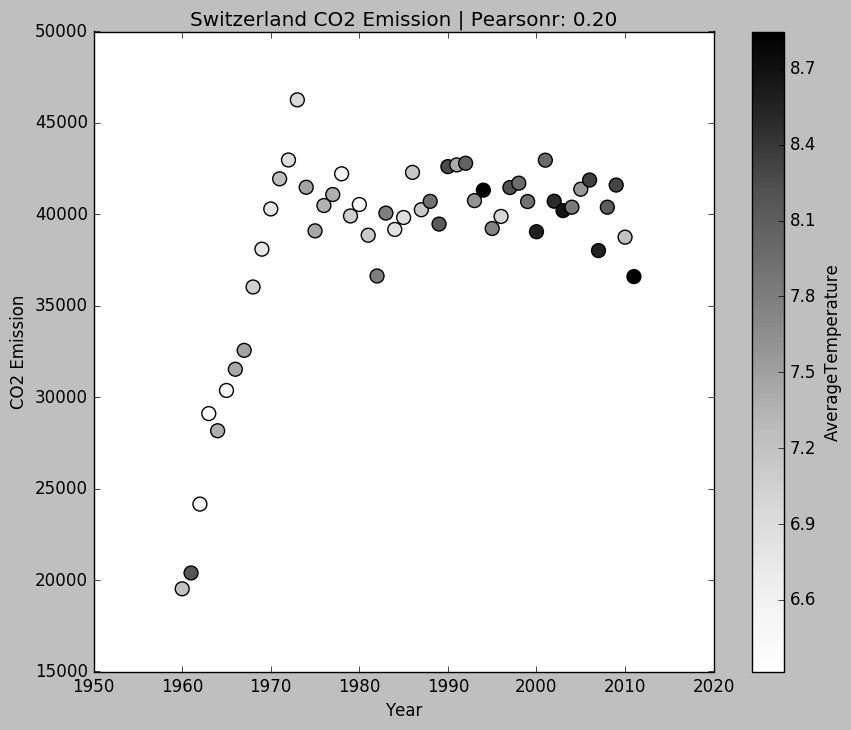

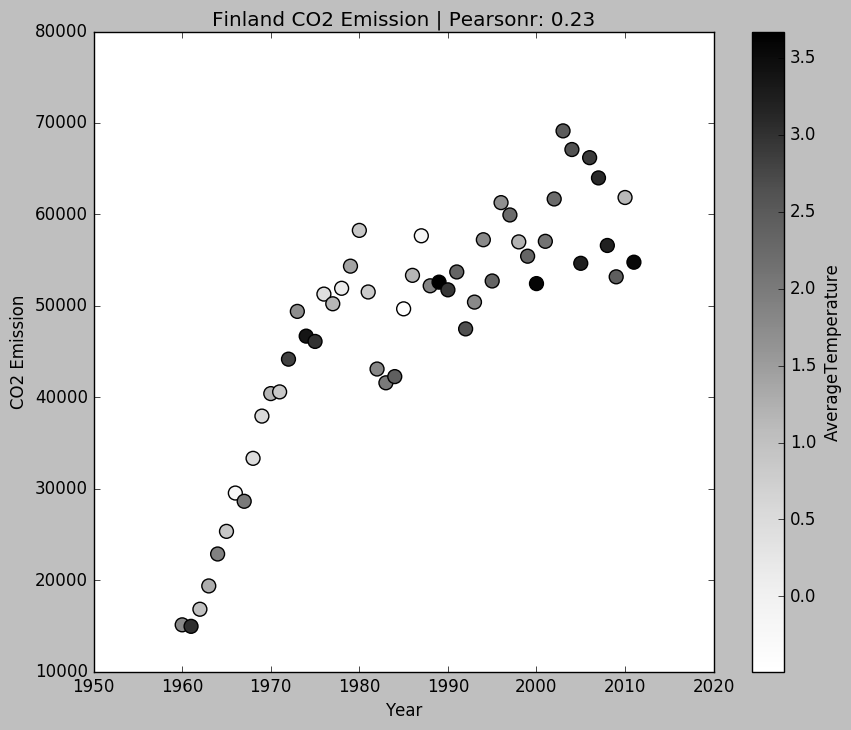

In [22]:
for country in eurozone_countries:
    plot_correlation(idf, tdf, country, indicator_dict['CO2'])

These are perhaps the most surprising results of all. All these countries have either levelled off (Finland and Switzerland) or drastically reduced (Sweden, Germany and UK) their CO2 emissions. However, we see that the average land temperature is on the rise in these countries! In terms of the Pearson correlation coefficient, we see that it is negligible for Switzerland and Finland and there seems to be a negative correlation in the case of Germany, Switzerland and the UK.

Let's examine this bizarre phenomenon in more detail. Could it be that the temperature increase in Germany, Sweden and the UK, despite the cut in CO2 emission, is a result of their neighbouring countries not following suit. Let us explore the European Union as a whole and see if this is indeed the case.

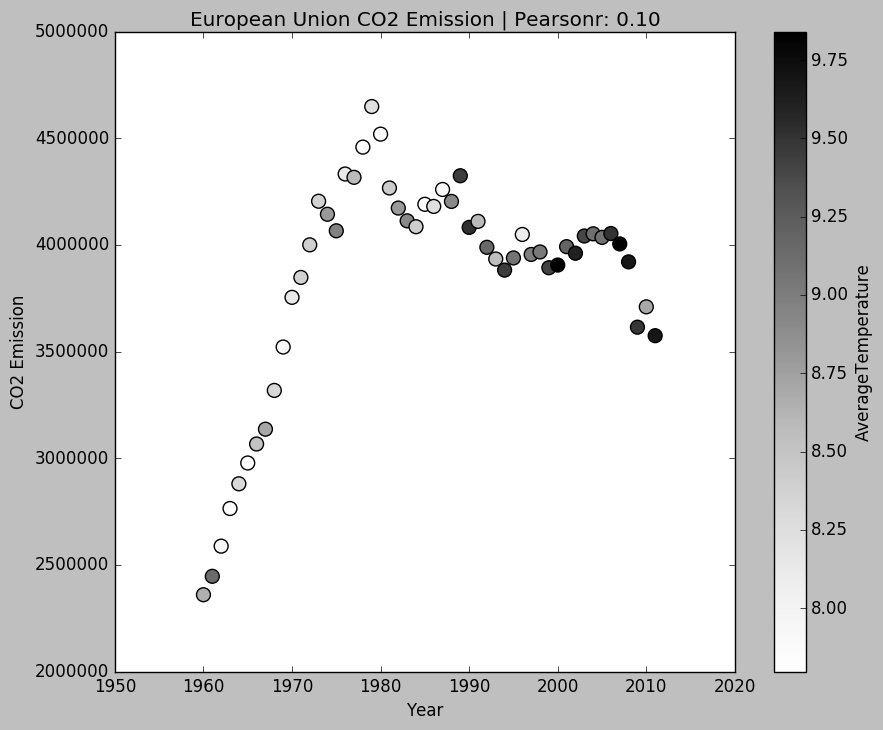

In [23]:
european_union = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 
                  'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 
                  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
                  'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']
idf_eu, tdf_eu = get_regional_df(european_union, 'European Union')
plot_correlation(idf_eu, tdf_eu, 'European Union', indicator_dict['CO2'])

Our theory about the EU does not seem to hold up. The data seems to indicate that the EU, as a whole, have significantly cut their CO2 emissions over the past few decades. However, this does not seem to have had any impact on the ever increasing average land temperatures. One explanation is that enough time has not passed since the reduction to have had any impact on the temperature, implying that land temperature changes do not follow a linear relationshop with CO2 emissions. Another explanation of this could be to extend our "neighbour" hypothesis further. Could it be that emissions in Asia & Africa are preventing the average temperatures in EU from normalizing? Time to find out!
##### One vital aspect to take note of is the trend of CO2 emissions in the European Union. The downward trend over the past decade is remarkable! #####

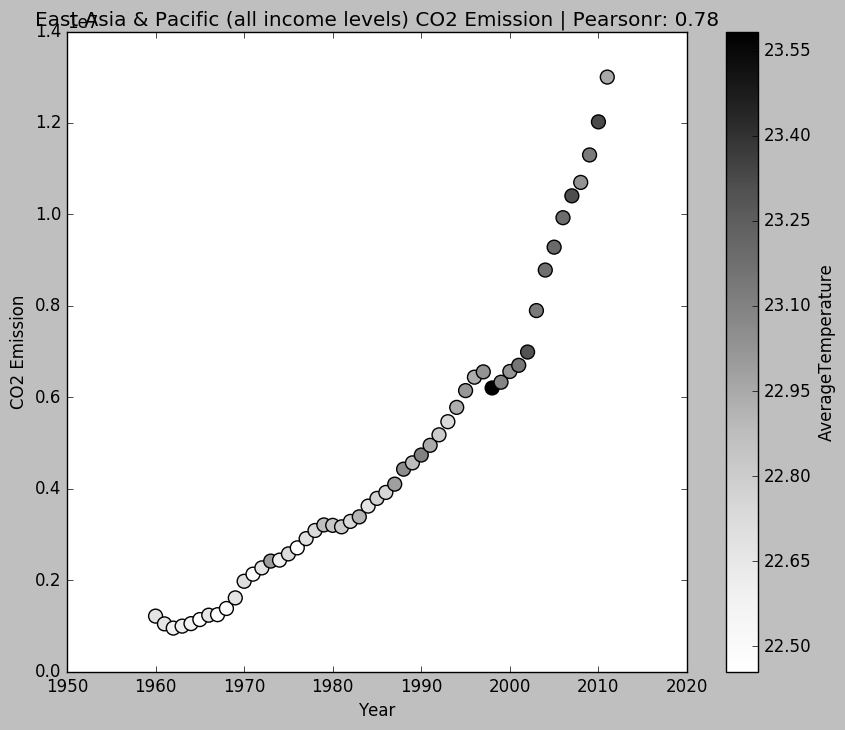

In [24]:
east_asia_pacific = ['American Samoa', 'Korea, Rep.', 'Philippines', 'Australia', 'Lao PDR', 
                     'Samoa', 'Brunei Darussalam', 'Macao SAR, China', 'Singapore', 'Cambodia', 
                     'Malaysia', 'Solomon Islands', 'China', 'Marshall Islands', 'Taiwan, China', 
                     'Fiji', 'Micronesia, Fed. Sts.', 'Thailand', 'French Polynesia', 'Mongolia', 
                     'Timor-Leste', 'Guam', 'Myanmar', 'Tonga', 'Hong Kong SAR, China', 'New Caledonia', 
                     'Tuvalu', 'Indonesia', 'New Zealand', 'Vanuatu', 'Japan', 'Northern Mariana Islands', 
                     'Vietnam', 'Kiribati', 'Palau', "Korea, Dem. People's Rep.", 'Papua New Guinea']
idf_eap, tdf_eap = get_regional_df(east_asia_pacific, 'East Asia & Pacific (all income levels)')
plot_correlation(idf_eap, tdf_eap, 'East Asia & Pacific (all income levels)', indicator_dict['CO2'])

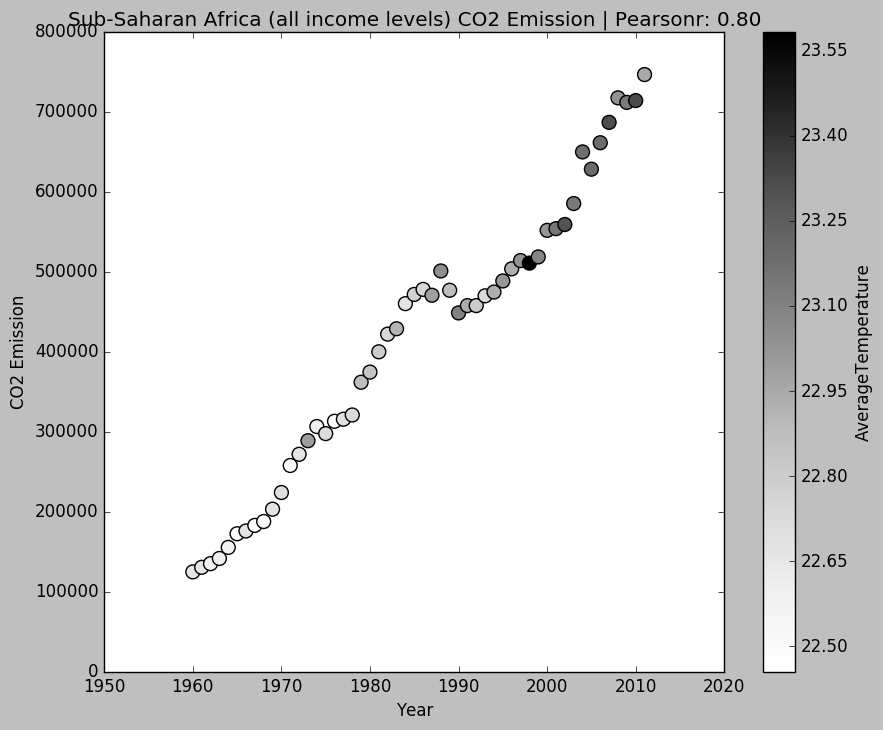

In [25]:
sub_saharan_africa = ['Angola', 'Gabon', 'Nigeria', 'Benin', 'Gambia, The', 'Rwanda', 'Botswana', 'Ghana', 
                      'S\xc3\xa3o Tom\xc3\xa9 and Principe', 'Burkina Faso', 'Guinea', 'Senegal', 'Burundi', 
                      'Guinea-Bissau', 'Seychelles', 'Cabo Verde', 'Kenya', 'Sierra Leone', 'Cameroon', 
                      'Lesotho', 'Somalia', 'Central African Republic', 'Liberia', 'South Africa', 'Chad', 
                      'Madagascar', 'South Sudan', 'Comoros', 'Malawi', 'Sudan', 'Congo, Dem. Rep.', 'Mali', 
                      'Swaziland', 'Congo, Rep', 'Mauritania', 'Tanzania', "C\xc3\xb4te d'Ivoire", 'Mauritius', 
                      'Togo', 'Equatorial Guinea', 'Mozambique', 'Uganda', 'Eritrea', 'Namibia', 'Zambia', 
                      'Ethiopia', 'Niger', 'Zimbabwe']
idf_ssa, tdf_ssa = get_regional_df(east_asia_pacific, 'Sub-Saharan Africa (all income levels)')
plot_correlation(idf_ssa, tdf_ssa, 'Sub-Saharan Africa (all income levels)', indicator_dict['CO2'])

Clearly, East Asia & Pacific and Sub Saharan Africa are heavy CO2 emitting regions. This validates our second theory on the "neighbour" effect to some degree and let's us infer that Global Warming is indeed a *Global* phenomenon.

Let's now have a look at the state of affairs in North America. 

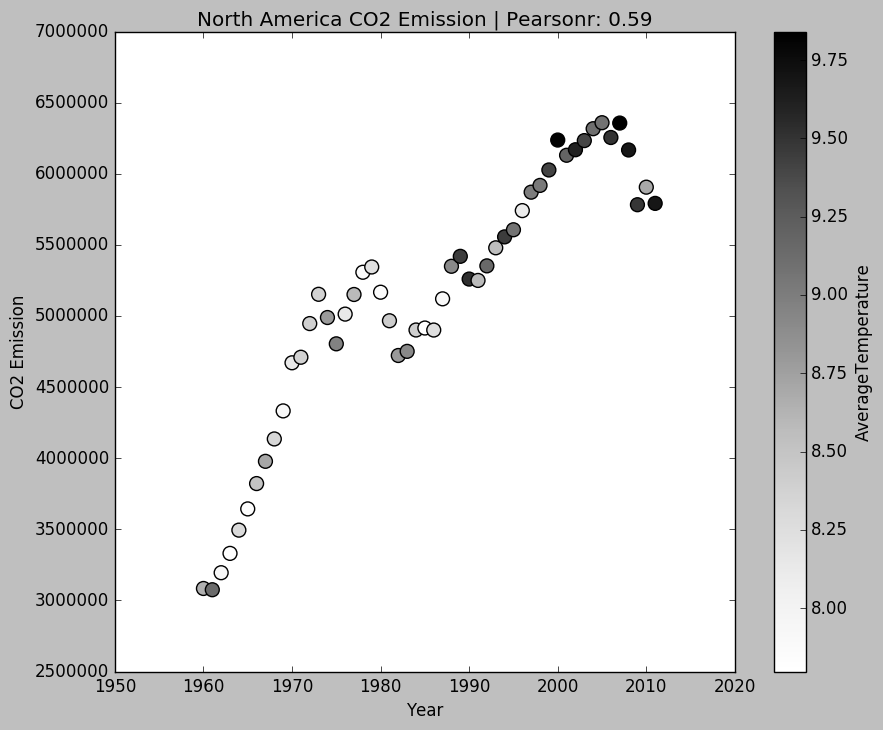

In [26]:
north_america = ['United States', 'Mexico', 'Canada', 'Guatemala', 'Cuba', 'Haiti', 'Dominican Republic', 
                 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Puerto Rico', 'Jamaica',
                 'Trinidad and Tobago', 'Bahamas', 'Belize', 'Barbados']
idf_na, tdf_na = get_regional_df(european_union, 'North America')
plot_correlation(idf_na, tdf_na, 'North America', indicator_dict['CO2'])

Once again, we conclude that one of our earlier theories might explain the lack of average temperature reduction in North America. However, the silver lining once again remains the downward trend of CO2 emissions in the past decade. This trend is demonstrated by most developed "High Income" countries in the dataset, as seen below.

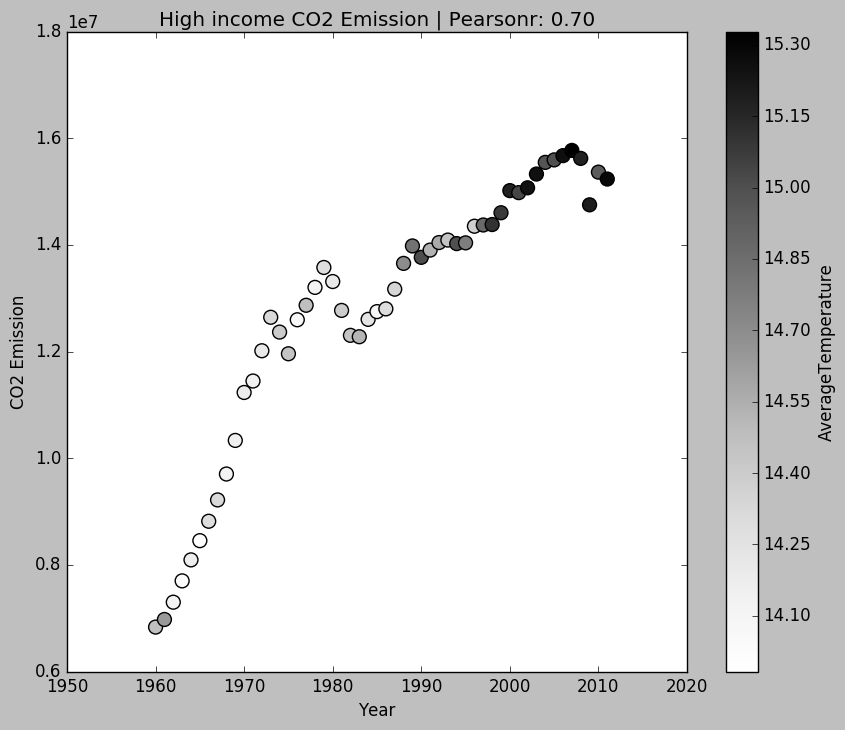

In [27]:
high_income = ['Andorra', 'Germany', 'Poland', 'Antigua and Barbuda', 'Greece', 'Portugal', 'Argentina', 
               'Greenland', 'Puerto Rico', 'Aruba', 'Guam', 'Qatar', 'Australia', 'Hong Kong SAR, China', 
               'Russian Federation', 'Austria', 'Hungary', 'San Marino', 'Bahamas, The', 'Iceland', 
               'Saudi Arabia', 'Bahrain', 'Ireland', 'Seychelles', 'Barbados', 'Isle of Man', 'Singapore', 
               'Belgium', 'Israel', 'Sint Maarten (Dutch part)', 'Bermuda', 'Italy', 'Slovak Republic', 
               'Brunei Darussalam', 'Japan', 'Slovenia', 'Canada', 'Korea, Rep.', 'Spain', 'Cayman Islands', 
               'Kuwait', 'St. Kitts and Nevis', 'Channel Islands', 'Latvia', 'St. Martin (French part)', 
               'Chile', 'Liechtenstein', 'Sweden', 'Croatia', 'Lithuania', 'Switzerland', 'Cura\xc3\xa7ao', 
               'Luxembourg', 'Taiwan, China', 'Cyprus', 'Macao SAR, China', 'Trinidad and Tobago', 
               'Czech Republic', 'Malta', 'Turks and Caicos Islands', 'Denmark', 'Monaco', 'United Arab Emirates', 
               'Estonia', 'Netherlands', 'United Kingdom', 'Equatorial Guinea', 'New Caledonia', 'United States', 
               'Faroe Islands', 'New Zealand', 'Uruguay', 'Finland', 'Northern Mariana Islands', 'Venezuela, RB', 
               'France', 'Norway', 'Virgin Islands (U.S.)', 'French Polynesia', 'Oman']
idf_hi, tdf_hi = get_regional_df(high_income, 'High income')
plot_correlation(idf_hi, tdf_hi, 'High income', indicator_dict['CO2'])

Regrettably though, the the region I live in does not seem to demonstrate any downward trend. Rather, we seem to be releasing more CO2 each year. The trend and temperature show a clear and strong positive correlation as seen below:

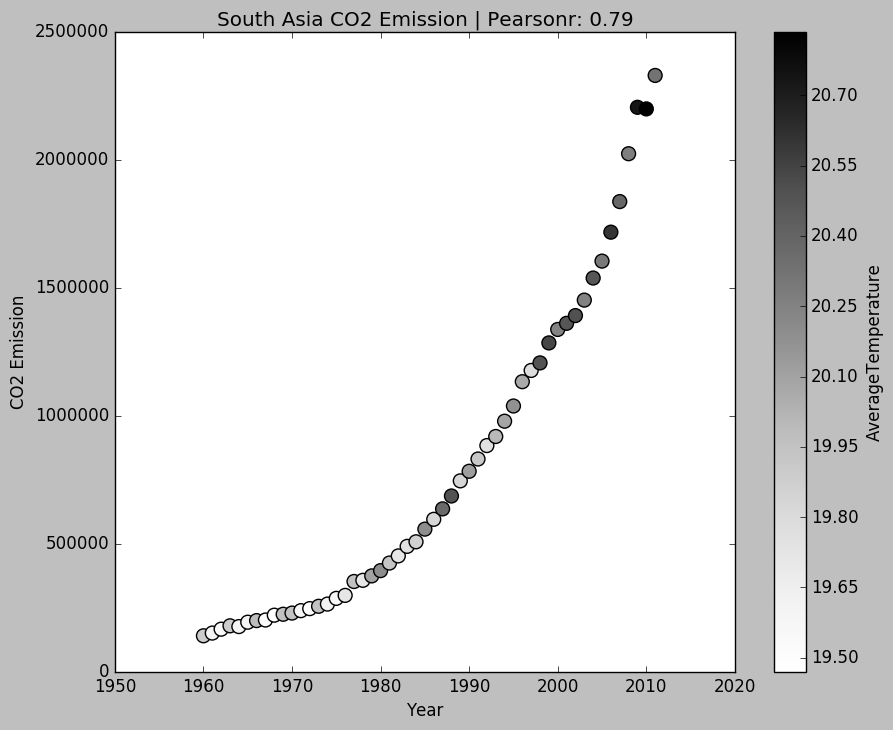

In [28]:
south_asia = ['Afghanistan', 'India', 'Pakistan', 'Bangladesh', 'Maldives', 'Sri Lanka','Bhutan', 'Nepal']
idf_sa, tdf_sa = get_regional_df(south_asia, 'South Asia')
plot_correlation(idf_sa, tdf_sa, 'South Asia', indicator_dict['CO2'])

Likewise, the world in general seems to be heading the wrong way entirely. CO2 emissions and average land temperatures are at record highs and seem to be worsening. Climate change deniers, take note. Unless people * #FeelTheBurn * (pun intended) soon, we are headed for a disaster!

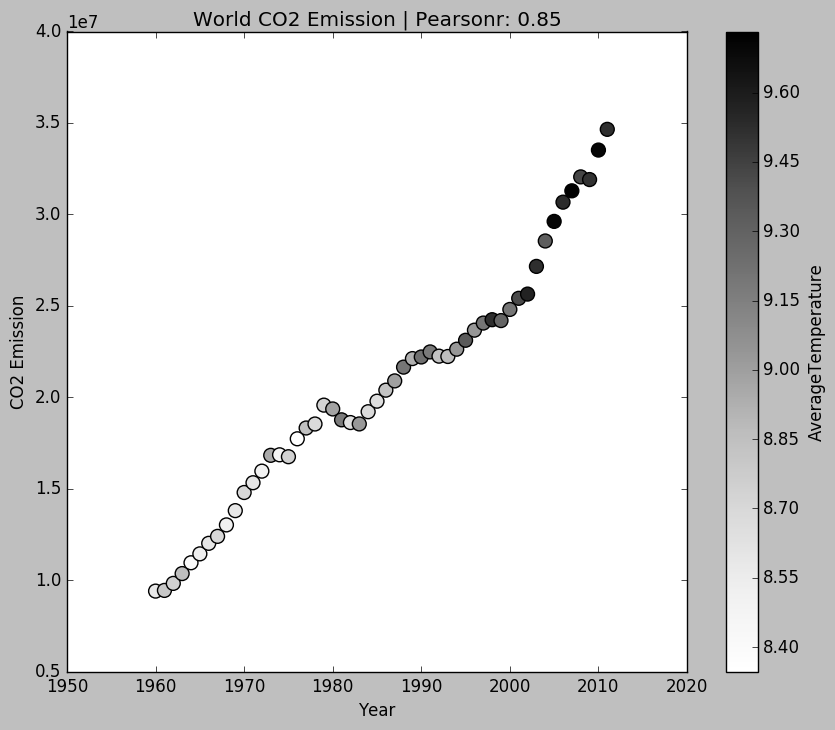

In [29]:
plot_correlation(idf, tdf_world, 'World', indicator_dict['CO2'])

### Closing Thoughts ###
- The European Union leads the world on reducing CO2 emissions, but they cannot do it alone!
- The US, EU and most developed nations are headed in the right direction - towards reducing CO2 emissions
- Developing countries of the world need to follow suit ASAP - the current trend is simply disastrous.
- Global Warming is a Global Phenomenon. We share this world with the other countries and its residents. While the EU has made significant progress in reducing CO2 emissions, we will not begin to see the change until all countries follow suit.
- The change may not come immediately. It could be that we will begin to see the positive effects of reducing CO2 emissions only after a brief lag, as is the case with temperature increase.